In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the datasets
train_df = pd.read_csv(r"C:\Users\rahul\Desktop\projects\Titanic\train.csv")
test_df = pd.read_csv(r"C:\Users\rahul\Desktop\projects\Titanic\test.csv")
gender_submission = pd.read_csv(r"C:\Users\rahul\Desktop\projects\Titanic\gender_submission.csv")

In [15]:
# Display the first few rows of the train dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# Check the shape of the datasets
print("Train Data Shape:", train_df.shape)

Train Data Shape: (891, 12)


In [17]:
print("Test Data Shape:", test_df.shape)

Test Data Shape: (418, 11)


In [18]:
# Check for missing values
print("\nMissing values in Train Data:\n", train_df.isnull().sum())


Missing values in Train Data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [19]:
print("\nMissing values in Test Data:\n", test_df.isnull().sum())


Missing values in Test Data:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [20]:
# Summary statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


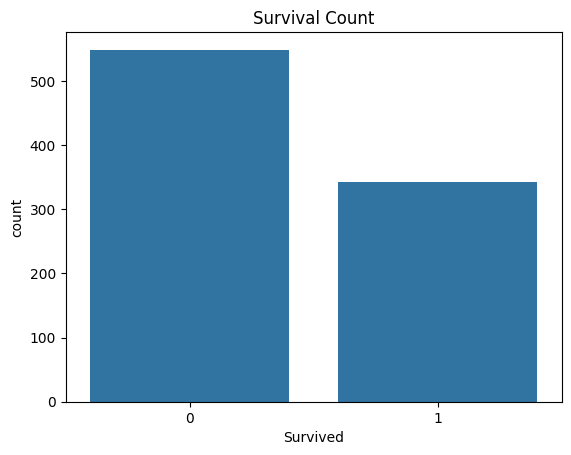

In [21]:
# Survival count
sns.countplot(data=train_df, x='Survived')
plt.title("Survival Count")
plt.show()

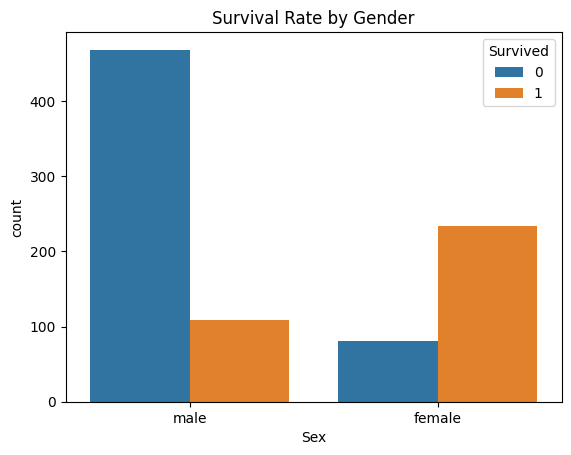

In [22]:
# Survival by gender
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title("Survival Rate by Gender")
plt.show()

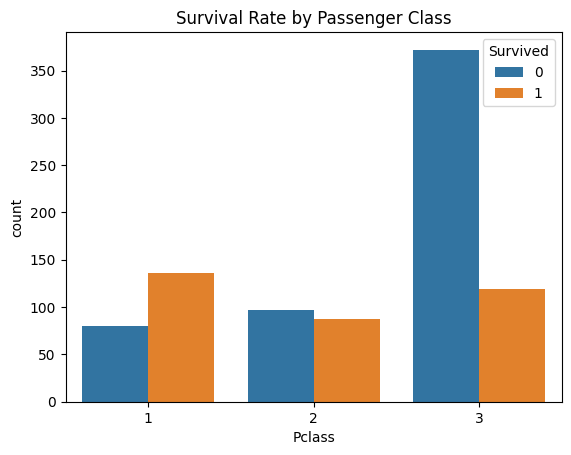

In [23]:
# Survival by passenger class
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title("Survival Rate by Passenger Class")
plt.show()

In [25]:
# Fill missing Age values with median
train_df.loc[:, 'Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df.loc[:, 'Age'] = test_df['Age'].fillna(test_df['Age'].median())


In [27]:
# Fill missing Embarked values with most common value
train_df.loc[:, 'Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df.loc[:, 'Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])


In [28]:
 # Fill missing Fare values in test dataset
test_df.loc[:, 'Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())


In [31]:
# Convert categorical variables to numeric
train_df.loc[:, 'Sex'] = train_df['Sex'].map({'male': 0, 'female': 1}).fillna(-1).astype(int)
test_df.loc[:, 'Sex'] = test_df['Sex'].map({'male': 0, 'female': 1}).fillna(-1).astype(int)



In [33]:
train_df.loc[:, 'Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}).fillna(-1).astype(int)
test_df.loc[:, 'Embarked'] = test_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}).fillna(-1).astype(int)


In [34]:
# Drop unnecessary columns
train_df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
test_df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [35]:
# Display processed train dataset
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,-1.0,22.0,1,0,7.2500,-1
1,2,1,1,-1.0,38.0,1,0,71.2833,-1
2,3,1,3,-1.0,26.0,0,0,7.9250,-1
3,4,1,1,-1.0,35.0,1,0,53.1000,-1
4,5,0,3,-1.0,35.0,0,0,8.0500,-1


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# Features and target variable
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)

Training Set Shape: (712, 8)
Validation Set Shape: (179, 8)


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")


Validation Accuracy: 0.7095


In [39]:
# Predict on the test dataset
test_predictions = model.predict(test_df)

# Create a submission file
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_predictions})
submission.to_csv('submission.csv', index=False)

# Show first few rows of the submission file
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [40]:
import joblib

# Save the model
joblib.dump(model, 'titanic_model.pkl')

# Load the model (for future use)
loaded_model = joblib.load('titanic_model.pkl')

# Verify by making predictions again
loaded_model.predict(X_val[:5])


array([0, 1, 0, 1, 0])